In [147]:
import numpy as np
import pandas as pd
from scipy import signal, optimize
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6

df_j = pd.read_csv('C:\\Users\\obinna.izima\\Documents\\Documents from Desktop_14.06.2020\\traces_March 8\\testcurves.csv')
j = df_j['Jitter'][:1001].values

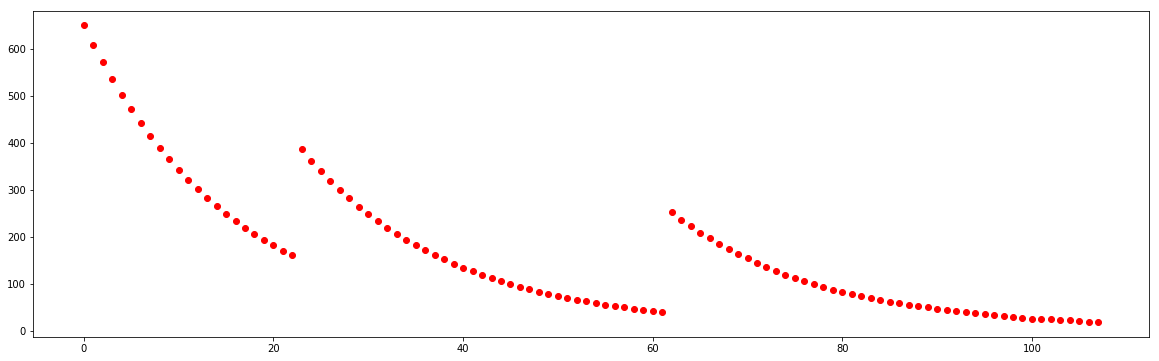

In [148]:
plt.plot(j,'ro')

In [149]:
a = j[:23]
b = j[23:62]
c = j[62:]

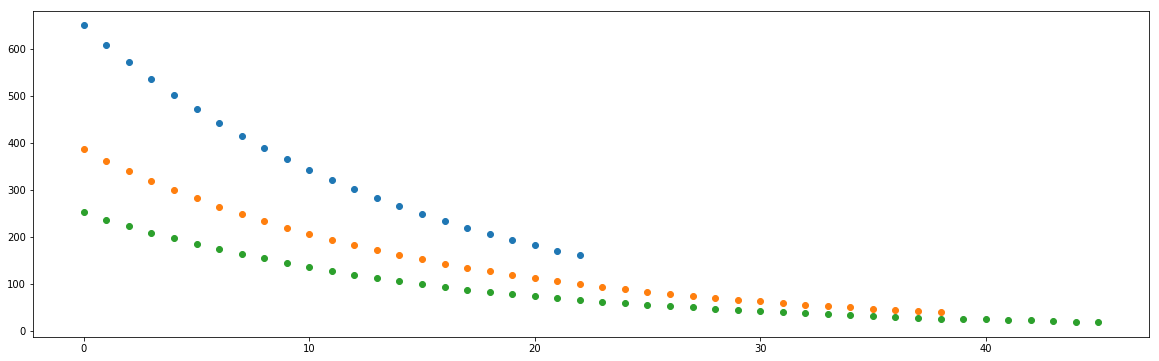

In [150]:
plt.plot(a,'o')
plt.plot(b,'o')
plt.plot(c,'o')

In [151]:
#np.asmatrix([a,b,c])
a = np.reshape(a, (a.shape[0], 1))
b = np.reshape(b, (b.shape[0], 1))
c = np.reshape(c, (c.shape[0], 1))

In [152]:
a.shape

(23, 1)

In [155]:
X = np.concatenate((a,b[:23],c[:23]), axis=1)

In [157]:
X.shape

(23, 3)

In [162]:
X_log = np.log(X)

In [158]:
Y = np.arange(1, len(X)+1)
Y.shape

(23,)

In [188]:
def computeCost(X, y, theta):
    # initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly
    J = 0

    # ====================== compute the hypothesis =====================
    h = np.dot(X, theta)
    
    #J = (1 / (2 * m)) * np.sum(np.square(h - y))

    J = (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    # ===========================================================
    return J

In [189]:
theta = np.zeros(X_log.shape[1])

In [190]:
computeCost(X,Y,theta)

94.0

In [191]:
def gradientDescent(X, y, theta, alpha, num_iters):

    # Initialize some useful values
    m = y.shape[0]  # number of training examples

    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()

    J_history = []  # Use a python list to save cost in every iteration

    for i in range(num_iters):
        # ==================== Compute the GD =================================
        
        pred = X@theta
        error = np.dot(X.T, (pred - Y))
        descent=(alpha / m) * error
        theta-=descent
        
        # =====================================================================

        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history


In [192]:
iterations = 200000
alpha = 0.01


In [193]:
theta, J_history = gradientDescent(X_log ,Y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print(theta)

Theta found by gradient descent: 115.3351, 4.2992
[ 115.33508211    4.29918277 -139.34818211]


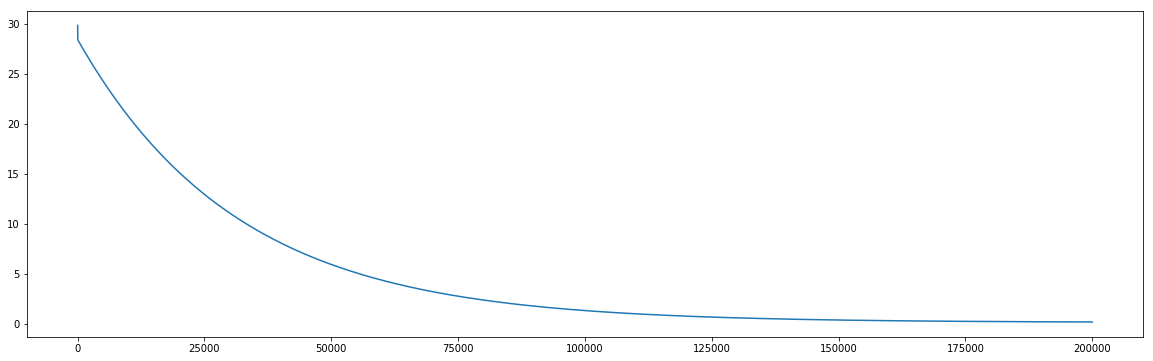

In [196]:
plt.plot(J_history)
#plt.axis('off')

In [186]:
theta

array([ 116.854865  ,    4.27311487, -141.12554876])

In [187]:
X

array([[650.2120319 , 386.859093  , 253.1438049 ],
       [609.6619535 , 363.1057122 , 237.5842962 ],
       [571.9492203 , 341.013751  , 223.4726388 ],
       [536.4599426 , 320.2696555 , 210.0449322 ],
       [503.3212726 , 300.8559479 , 197.6531031 ],
       [472.1334361 , 282.658347  , 185.8601106 ],
       [443.0139852 , 265.3412211 , 174.9801453 ],
       [415.7232848 , 249.3604781 , 165.3012821 ],
       [390.1294684 , 234.3815941 , 155.7069311 ],
       [365.9167447 , 220.3387028 , 146.000609  ],
       [343.433587  , 207.1730477 , 136.8991751 ],
       [322.1317239 , 194.8310656 , 128.5749559 ],
       [302.2658523 , 183.2602698 , 120.6183545 ],
       [283.7633129 , 172.4127113 , 113.2631309 ],
       [266.2925989 , 162.2431877 , 106.3131019 ],
       [249.8895476 , 152.7092593 , 100.3375539 ],
       [234.6623398 , 143.6598195 ,  94.13977619],
       [220.3889574 , 135.2843516 ,  88.77665824],
       [206.8540781 , 127.4347254 ,  83.61974904],
       [194.1904344 , 120.07601

In [167]:
def gradientDescent(X, y, theta, alpha, num_iters):

    # Initialize some useful values
    m = y.shape[0]  # number of training examples

    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()

    J_history = []  # Use a python list to save cost in every iteration

    for i in range(num_iters):
        # ==================== Compute the GD =================================
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)

        # =====================================================================

        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history


In [173]:
theta, J_history = gradientDescent(X_log ,Y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print(theta)

ValueError: shapes (23,) and (3,23) not aligned: 23 (dim 0) != 3 (dim 0)

In [137]:
theta0=np.array([0.0, 0.0,0.0])
theta0 = np.reshape(theta0, (theta0.shape[0], 1))
theta0.shape

(3, 1)

In [134]:
#x_bias = np.ones((n,1))
#X = np.reshape(X,(n,1))
XX = np.append(x_bias,X,axis=1)

In [135]:
XX.shape

(23, 3)

In [80]:
X.shape

(23, 2)

In [81]:
Y.shape

(23, 3)

In [89]:
theta.shape

(2,)

In [146]:
XX

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  2.],
       [ 1.,  1.,  3.],
       [ 1.,  1.,  4.],
       [ 1.,  1.,  5.],
       [ 1.,  1.,  6.],
       [ 1.,  1.,  7.],
       [ 1.,  1.,  8.],
       [ 1.,  1.,  9.],
       [ 1.,  1., 10.],
       [ 1.,  1., 11.],
       [ 1.,  1., 12.],
       [ 1.,  1., 13.],
       [ 1.,  1., 14.],
       [ 1.,  1., 15.],
       [ 1.,  1., 16.],
       [ 1.,  1., 17.],
       [ 1.,  1., 18.],
       [ 1.,  1., 19.],
       [ 1.,  1., 20.],
       [ 1.,  1., 21.],
       [ 1.,  1., 22.],
       [ 1.,  1., 23.]])